In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.environ["OMP_NUM_THREADS"] = "1"  # Set it to your desired number of threads
import missingno as msno

from IPython.display import display #To display dataframe with a nice format.

# Setting display precision for pandas
pd.set_option("display.precision", 2)
# Set display option to show all columns
pd.set_option('display.max_columns', None)

blue_green      = (82/255, 162/255, 160/255)
blue_green_dark = (41/255, 81/255, 81/255)

# ==================================================================================================
# Set the fontsize & Bold for each GRAPH !!!
# ==================================================================================================
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14
plt.rcParams["axes.titleweight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["lines.linewidth"] = 3
plt.rcParams["lines.markersize"] = 10
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams['axes.titlepad'] = 20 

In [2]:
# ==================================================================================================
# READ DATA
# ==================================================================================================
import csv
url_df_data               = r"C:\Users\Olivi\OneDrive\Documents\OC_Formation_DATA_SCIENCE\PROJET6_Classifiez_automatiquement_des_biens_de_consommation\DATA\Flipkart\flipkart_com-ecommerce_sample_1050.csv"
df_data = pd.read_csv(url_df_data)

print("Datasets loaded succesfully ! :D")

Datasets loaded succesfully ! :D


In [3]:
df_data.sample(20)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
778,dbb55b8da8c30cb67014d81405d98a41,2015-12-12 11:46:53 +0000,http://www.flipkart.com/mxofere-combo-orange-p...,Mxofere Combo Orange Papaya Jasmine Lemongrass...,"[""Beauty and Personal Care >> Combos and Kits ...",CBKEBVA8DNSJG8R2,285.0,285.0,dbb55b8da8c30cb67014d81405d98a41.jpg,False,Buy Mxofere Combo Orange Papaya Jasmine Lemong...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Organic Ty..."
158,41fd5af61752be98b19b611a6ff9a0ef,2015-12-01 12:40:44 +0000,http://www.flipkart.com/prithish-friend-indeed...,Prithish Friend Indeed Ceramic Mug,"[""Kitchen & Dining >> Coffee Mugs >> Prithish ...",MUGE92Z4ZTV8UZYN,599.0,225.0,41fd5af61752be98b19b611a6ff9a0ef.jpg,False,Buy Prithish Friend Indeed Ceramic Mug for Rs....,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Type"", ""va..."
208,55ce1309b69e1912d2fd60a3ee3f351b,2015-12-01 12:40:44 +0000,http://www.flipkart.com/tatvaarts-elephant-min...,Tatvaarts Elephant Mini ( Fine-Finish) Showpie...,"[""Home Decor & Festive Needs >> Showpieces >> ...",SHIEBZB44JP2JZNG,5000.0,4200.0,55ce1309b69e1912d2fd60a3ee3f351b.jpg,False,Tatvaarts Elephant Mini ( Fine-Finish) Showpie...,No rating available,No rating available,Tatvaarts,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
135,fd369a1bb58ae02cd925dda7e9e1d00a,2015-12-01 12:40:44 +0000,http://www.flipkart.com/prithish-working-my-ow...,Prithish Working on my own Grass Ceramic Mug,"[""Kitchen & Dining >> Coffee Mugs >> Prithish ...",MUGE8S9KB8DUER6P,499.0,175.0,fd369a1bb58ae02cd925dda7e9e1d00a.jpg,False,Prithish Working on my own Grass Ceramic Mug (...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Type"", ""va..."
740,fd53c8ed19e77c3e65d767e6aee5fad7,2016-01-04 04:50:59 +0000,http://www.flipkart.com/pindia-apple-macbook-p...,Pindia Apple Macbook Pro 13 13.3 Inch Mb990hn/...,"[""Computers >> Laptop Accessories >> Anti Dust...",ADPE9CJZQVCPDWHN,449.0,299.0,fd53c8ed19e77c3e65d767e6aee5fad7.jpg,False,Buy Pindia Apple Macbook Pro 13 13.3 Inch Mb99...,No rating available,No rating available,Pindia,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
283,4d2e9f36823bad0f6fe8c6b19bb92bdb,2016-04-24 18:34:50 +0000,http://www.flipkart.com/yves-bertelin-ybscr557...,Yves Bertelin YBSCR557 Analog Watch - For Women,"[""Watches >> Wrist Watches >> Yves Bertelin Wr...",WATEHYHJZDVZXNHZ,6950.0,3475.0,4d2e9f36823bad0f6fe8c6b19bb92bdb.jpg,False,Specifications of Yves Bertelin YBSCR557 Analo...,No rating available,No rating available,Yves Bertelin,"{""product_specification""=>[{""key""=>""Mechanism""..."
96,f12a06b7dbfc55638afafcf8bb03d836,2016-01-04 00:20:04 +0000,http://www.flipkart.com/my-angel-gifts-show-pi...,My Angel Gifts Show Piece Showpiece - 5 cm,"[""Home Decor & Festive Needs >> Table Decor & ...",SHIEAVZQQUWKYURZ,1299.0,1149.0,f12a06b7dbfc55638afafcf8bb03d836.jpg,False,Buy My Angel Gifts Show Piece Showpiece - 5 ...,No rating available,No rating available,My Angel,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
373,5c6b9db55291a68d99c4bb9a88266e27,2015-12-01 06:13:00 +0000,http://www.flipkart.com/edimax-br6524n-n300-wi...,Edimax BR6524N N300 Wireless Router,"[""Computers >> Network Components >> Routers >...",RTRDYKYKKGPHZGHY,4200.0,2799.0,5c6b9db55291a68d99c4bb9a88266e27.jpg,False,Buy Edimax BR6524N N300 Wireless Router only f...,No rating available,No rating available,Edimax,"{""product_specification""=>[{""key""=>""Wireless S..."
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,

In [4]:
# Remove rows where 'product_specifications' is null
print("Nombre de lignes avant la suppression :", df_data.shape[0])
df_data = df_data.dropna(subset=['product_specifications'])
print("Nombre de lignes après la suppression :", df_data.shape[0])
df_data.reset_index(drop=True, inplace=True)


Nombre de lignes avant la suppression : 1050
Nombre de lignes après la suppression : 1049


## 0.3. Feature Engineering

### O.3.1. CATEGORIES - TOP, SECONDARY, TERTIARY

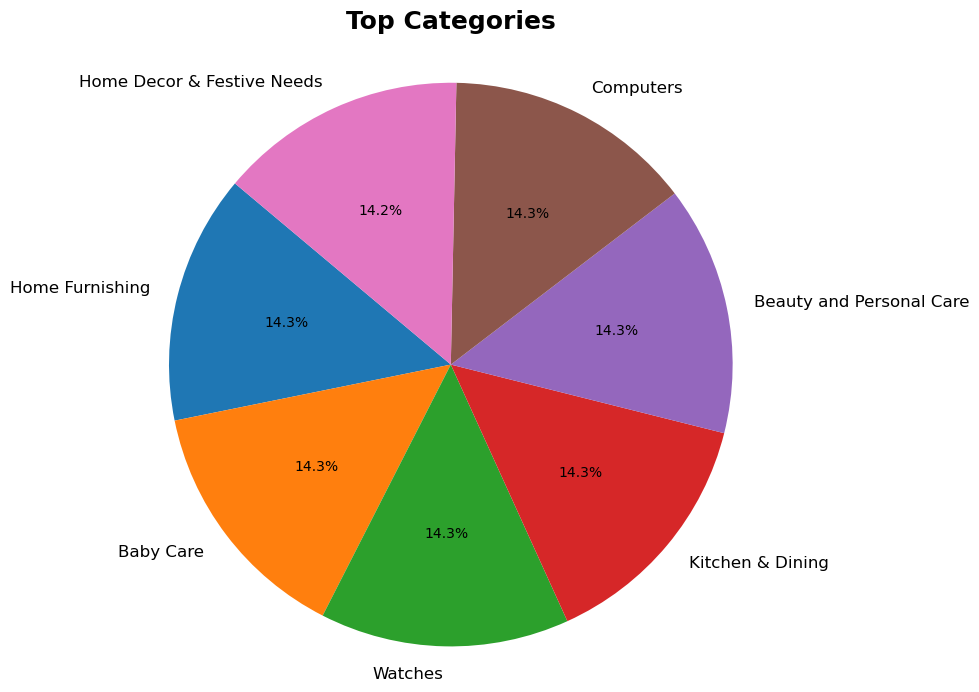

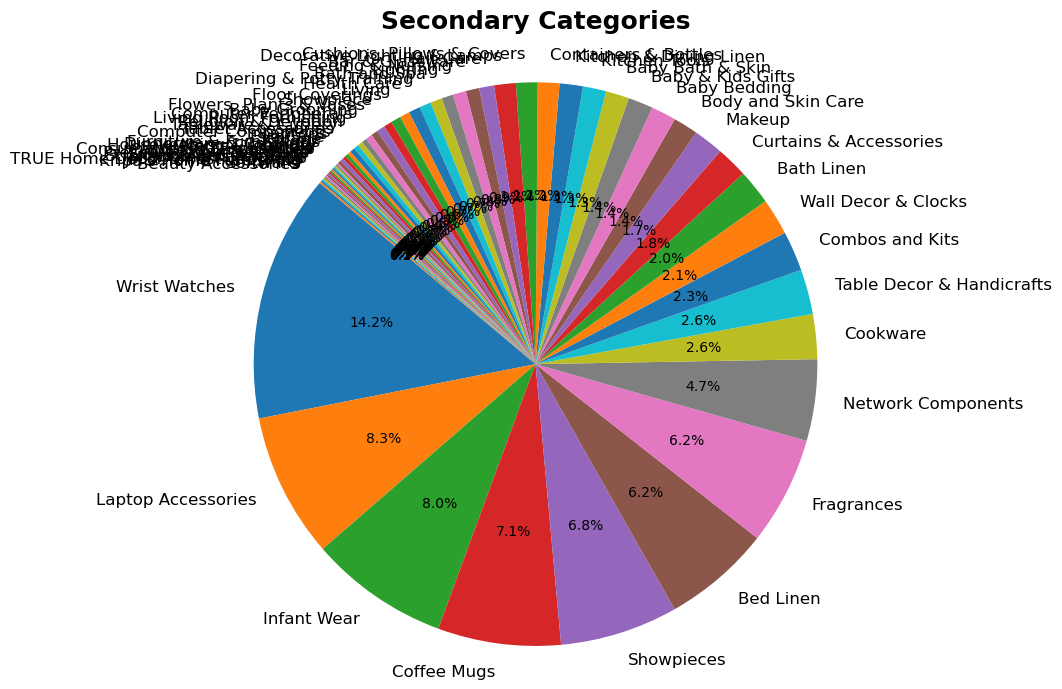

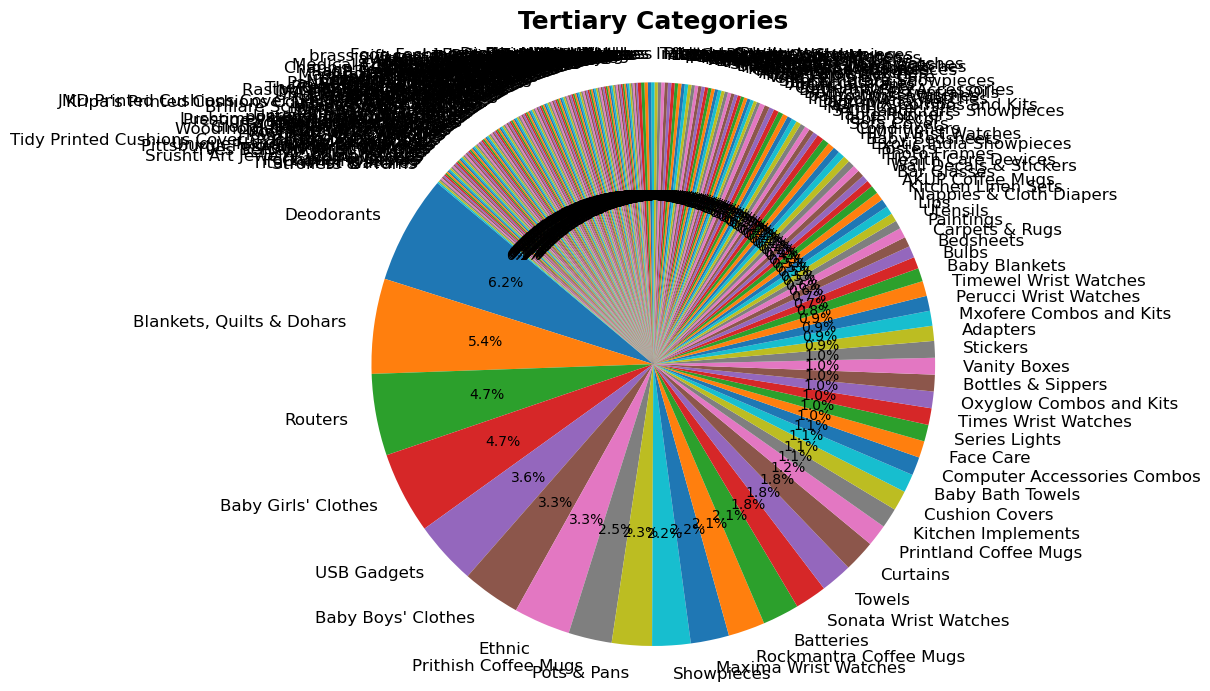

Number of unique top categories: 7
Number of unique secondary categories: 62
Number of unique tertiary categories: 240


In [5]:
# ==================================================================================================
# TOP, SECONDARY and TERTIARY CATEGORIES
# ==================================================================================================
# Function to extract top, secondary, and tertiary categories
def extract_categories(category_tree):
    # Split the category tree string and get categories
    categories = category_tree.strip('[]').split(">>")
    
    # Extract top category
    top_category = categories[0].strip().replace('"', '')
    
    # Extract secondary category if available
    secondary_category = categories[1].strip().replace('"', '') if len(categories) > 1 else None
    
    # Extract tertiary category if available
    tertiary_category = categories[2].strip().replace('"', '') if len(categories) > 2 else None
    
    return top_category, secondary_category, tertiary_category

# Apply the function to each row in the DataFrame
df_data['top_category'], df_data['secondary_category'], df_data['tertiary_category'] = zip(*df_data['product_category_tree'].apply(extract_categories))

# Extract unique categories
unique_top_categories = df_data['top_category'].unique()
unique_secondary_categories = df_data['secondary_category'].unique()
unique_tertiary_categories = df_data['tertiary_category'].unique()

# Function to plot pie chart for category distribution
def plot_category_pie_chart(categories, title):
    # Count the frequency of each category
    category_counts = categories.value_counts()
    
    # Plot pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()

# Plot pie chart for top categories
plot_category_pie_chart(df_data['top_category'], 'Top Categories')

# Plot pie chart for secondary categories
plot_category_pie_chart(df_data['secondary_category'], 'Secondary Categories')

# Plot pie chart for tertiary categories
plot_category_pie_chart(df_data['tertiary_category'], 'Tertiary Categories')



# ==================================================================================================
# COUNT NUMBER OF CATEGORY IN TOP, SECONDARY and TERTIARY
# ==================================================================================================
# Extract unique categories
nunique_top_categories = df_data['top_category'].nunique()
nunique_secondary_categories = df_data['secondary_category'].nunique()
nunique_tertiary_categories = df_data['tertiary_category'].nunique()

print("Number of unique top categories:", nunique_top_categories)
print("Number of unique secondary categories:", nunique_secondary_categories)
print("Number of unique tertiary categories:", nunique_tertiary_categories)

In [6]:
# IMPTUE TERTIARY CATEGORY
df_data['tertiary_category'].fillna("NO TERTIARY CATEGORY", inplace=True)

# I. Etudier la faisabilité de classification en utilisant des méthodes NLP basiques

## I.1. Prétraitement de textes (nettoyage, stemming et lemmatization)

In [7]:
# Set pandas display options to show more characters per column
pd.set_option('display.max_colwidth', None)

In [8]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re

# ==================================================================================================
# PRE-TREATMENT OF THE DESCRIPTION TEXT : CLEANING, STEMMING and LEMMATIZATION. 
# ==================================================================================================
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    # Remove punctuation and symbols using regular expressions
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Lowercasing
    tokens = [word.lower() for word in tokens]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Eliminate tokens with less than 4 letters
    tokens = [word for word in tokens if len(word) >= 3]
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)

# ==================================================================================================
# TEST - TO SEE EVOLUTION OF THE EXAMPLE
# ==================================================================================================
def preprocess_text_TEST(text):
    # Remove punctuation and symbols using regular expressions
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    print("After removing punctuation and symbols:", text)
    
    # Tokenization
    tokens = word_tokenize(text)
    print("After tokenization:", tokens)
    
    # Lowercasing
    tokens = [word.lower() for word in tokens]
    print("After lowercasing:", tokens)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    print("After removing stopwords:", tokens)
    
    # Eliminate tokens with less than 3 letters
    tokens = [word for word in tokens if len(word) >= 3]
    print("After eliminating tokens with less than 3 letters:", tokens)
    
    # Stemming
    # stemmer = PorterStemmer()
    # tokens = [stemmer.stem(word) for word in tokens]
    # print("After stemming:", tokens)
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    print("After lemmatization:", tokens)
    
    return " ".join(tokens)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Olivi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Olivi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Olivi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
# ==================================================================================================
# PRE-TREATMENT OF THE DESCRIPTION TEXT : CLEANING, STEMMING and LEMMATIZATION. 
# ==================================================================================================
# Apply preprocessing to the description column
df_data['clean_description'] = df_data['description'].apply(preprocess_text)

# Check the cleaned text
display(df_data['clean_description'].head())


0    key featur eleg polyest multicolor abstract eyelet door curtain floral curtain eleg polyest multicolor abstract eyelet door curtain height pack price curtain enhanc look interior curtain made high qualiti polyest fabric featur eyelet style stitch metal ring make room environ romant love curtain ant wrinkl anti shrinkag eleg appar give home bright modernist appeal design surreal attent sure steal heart contemporari eyelet valanc curtain slide smoothli draw apart first thing morn welcom bright sun ray want wish good morn whole world draw close even creat special moment joyou beauti given sooth print bring home eleg curtain softli filter light room get right amount sunlight specif eleg polyest multicolor abstract eyelet door curtain height pack gener brand eleg design door type eyelet model name abstract polyest door curtain set model duster color multicolor dimens length box number content sale packag pack sale packag curtain bodi design materi polyest
1                             

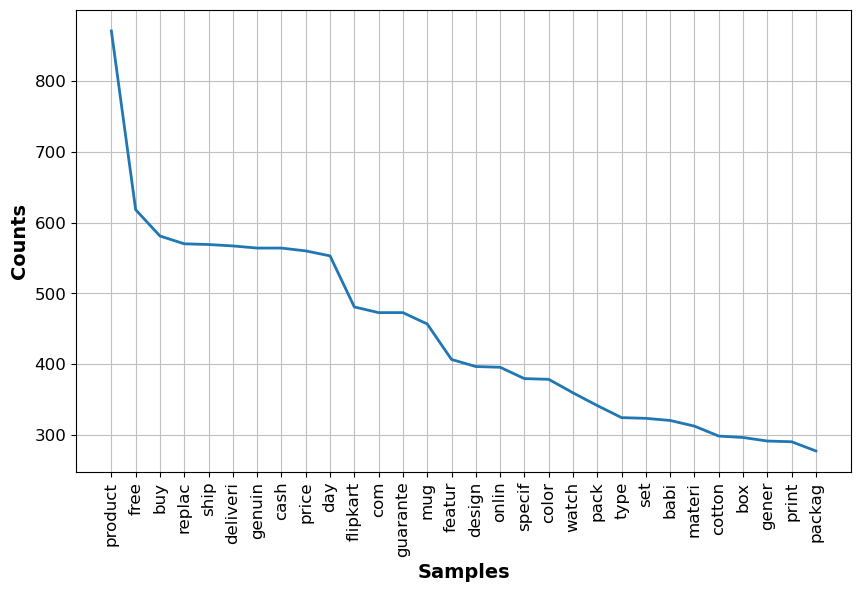

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function for visualization of word frequency
def visualize_word_frequency(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Create a frequency distribution of tokens
    freq_dist = nltk.FreqDist(tokens)
    # Plot the frequency distribution
    plt.figure(figsize=(10, 6))
    freq_dist.plot(30, cumulative=False)

# Visualize the word frequency distribution of the cleaned text
visualize_word_frequency(df_data['clean_description'].str.cat(sep=' '))

# III. NPL WITH RNN + LSTM

In [40]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, adjusted_rand_score


# Tokenize the texts and create a vocabulary
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(df_data['clean_description'])
X_sequences = tokenizer.texts_to_sequences(df_data['clean_description'])

# Pad the sequences so they all have the same length
X_padded = tf.keras.preprocessing.sequence.pad_sequences(X_sequences)

# Encode the target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df_data['top_category'])

# Define the RNN model
embedding_dim = 200  # Dimensionality of the word embeddings
vocab_size = len(tokenizer.word_index) + 1  # Vocabulary size (+1 for padding token)


# Define the number of folds for cross-validation
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics
accuracies = []
aris = []
best_y_pred = None
best_ari = float('-inf')



# Perform cross-validation
for train_index, test_index in skf.split(X_padded, y_encoded):
    X_train, X_test = X_padded[train_index], X_padded[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]

    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim))
    model.add(SpatialDropout1D(0.1))
    model.add(LSTM(50, dropout=0.1, recurrent_dropout=0.1))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))

    # model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=0)

    y_pred = np.argmax(model.predict(X_test), axis=-1)
    accuracy = accuracy_score(y_test, y_pred)
    ari = adjusted_rand_score(y_test, y_pred)
    
    accuracies.append(accuracy)
    aris.append(ari)
    
    # Check if current ARI is better than the best ARI so far
    if ari > best_ari:
        best_ari = ari
        bets_accuracy = accuracy
        best_y_pred = y_pred
        best_y_test = y_test

        

# Calculate the mean accuracy and ARI across folds
mean_accuracy = np.mean(accuracies)
mean_ari = np.mean(aris)

# Print results
print("Mean Accuracy (cross-validated):", mean_accuracy)
print("Mean Adjusted Rand Index (cross-validated):", mean_ari)
print("Best ARI:", best_ari)
print("Best Accuracy:", bets_accuracy)
print("Best y_pred:", best_y_pred)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Mean Accuracy (cross-validated): 0.8904260651629073
Mean Adjusted Rand Index (cross-validated): 0.7670806252705619
Best ARI: 0.8855122371510602
Best Accuracy: 0.9473684210526315
Best y_pred: [6 6 6 6 6 6 5 4 5 5 2 1 1 1 4 5 0 3 4 3 5 3 3 3 3 3 1 1 3 0 5 5 5 5 5 5 5
 5 5 5 5 3 5 3 5 3 5 3 3 5 3 5 5 0 6 4 3 0 3 3 3 1 2 1 1 2 2 1 2 1 2 1 1 1
 1 1 2 2 2 1 1 1 2 1 0 2 4 0 4 4 4 5 4 0 5 5 2 2 6 2 6 6 6 6 6 6 6 6 6 6 6
 6 6 0 2 3 6 0 0 0 4 3 4 3 3 3 1 1 3 4 4 4 0 4 1 5 5 5 4 6 6 5 4 0 6 6 6 6
 6 4 1 2 1 1 1 3 6 2 2 2 2 2 2 2 2 2 2 2 2 2 0 4 4 4 4 4 4 1 2 0 0 3 4 4 3
 3 3 4 4 4 4 4 0 0 0 0 0 5 5 1 0 0 0 4 4 2 2 3 3]


In [41]:
# Initialize a dictionary to store the count of misclassifications for each top category
misclassification_count = {category: 0 for category in label_encoder.classes_}

# Iterate through each test instance and compare the predicted label with the actual label
for true_label, pred_label in zip(y_test, y_pred):
    if true_label != pred_label:
        # Increment the misclassification count for the true label
        true_category = label_encoder.inverse_transform([true_label])[0]
        misclassification_count[true_category] += 1

# Initialize a dictionary to store the percentage of error for each top category
error_percentage = {}

# Calculate the percentage of error for each top category
total_instances_per_category = {category: np.sum(y_test == label_encoder.transform([category])[0]) for category in label_encoder.classes_}
for category, count in misclassification_count.items():
    error_percentage[category] = (count / total_instances_per_category[category]) * 100

# Print the percentage of error for each top category
for category, percentage in error_percentage.items():
    print(f"Error percentage for {category}: {percentage:.2f}%")

Error percentage for Baby Care: 23.33%
Error percentage for Beauty and Personal Care: 6.67%
Error percentage for Computers: 0.00%
Error percentage for Home Decor & Festive Needs: 6.90%
Error percentage for Home Furnishing: 0.00%
Error percentage for Kitchen & Dining: 0.00%
Error percentage for Watches: 0.00%


In [42]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ (None, 356, 200)       │       783,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_9             │ (None, 356, 200)       │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 50)             │        50,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 7)              │           357 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,501,273 (9.54 MB)

 Trainable params: 833,757 (3.18 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,667,516 (6.36 MB)

In [43]:
len(X_tsne)

1049

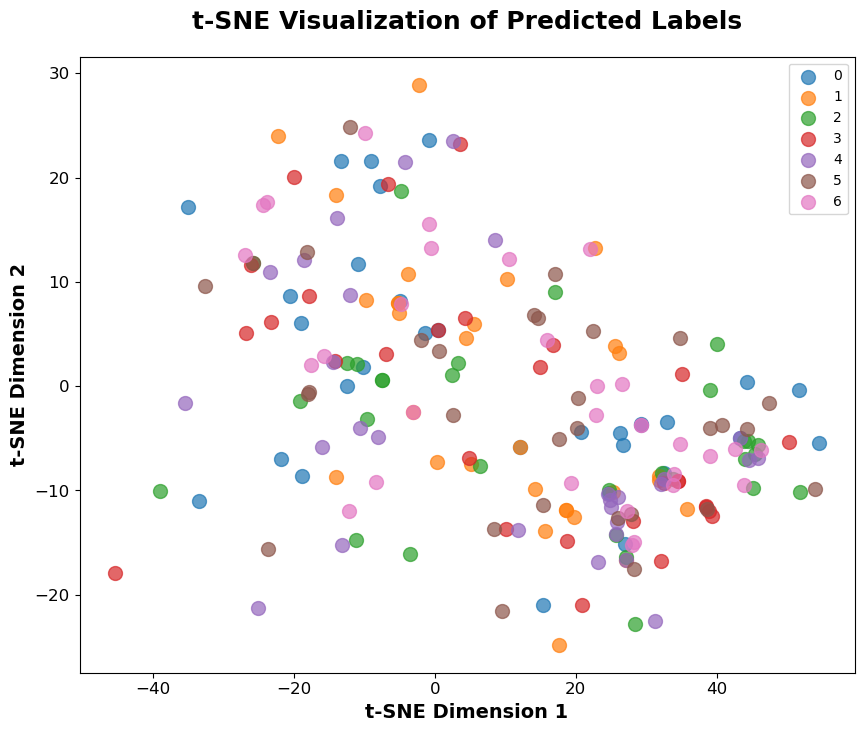

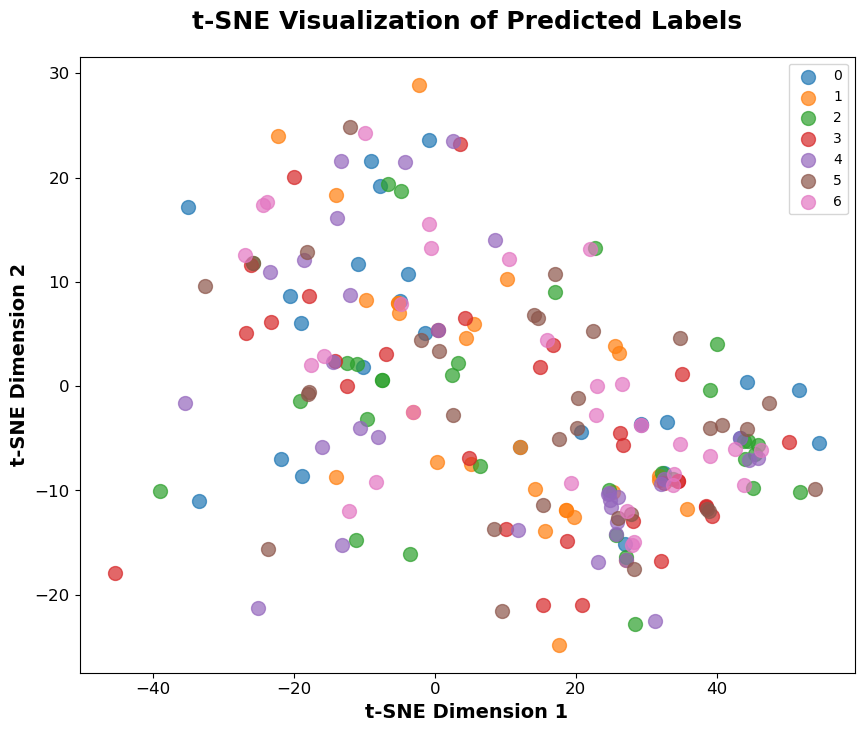

In [47]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Compute t-SNE embeddings
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_padded)

# Create a scatter plot colored by true labels
plt.figure(figsize=(10, 8))
for label in np.unique(best_y_test):
    indices = np.where(best_y_test == label)
    plt.scatter(X_tsne[indices, 0], X_tsne[indices, 1], label=label, alpha=0.7)

plt.title('t-SNE Visualization of Predicted Labels')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()

# Create a scatter plot colored by predicted labels
plt.figure(figsize=(10, 8))
for label in np.unique(best_y_pred):
    indices = np.where(best_y_pred == label)
    plt.scatter(X_tsne[indices, 0], X_tsne[indices, 1], label=label, alpha=0.7)

plt.title('t-SNE Visualization of Predicted Labels')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()

In [46]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, adjusted_rand_score

# Tokenize the texts and create a vocabulary
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(df_data['clean_description'])
X_sequences = tokenizer.texts_to_sequences(df_data['clean_description'])

# Pad the sequences so they all have the same length
X_padded = tf.keras.preprocessing.sequence.pad_sequences(X_sequences)

# Encode the target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df_data['top_category'])

# Define the RNN model
embedding_dim = 200  # Dimensionality of the word embeddings
vocab_size = len(tokenizer.word_index) + 1  # Vocabulary size (+1 for padding token)

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim))
model.add(SpatialDropout1D(0.1))
model.add(LSTM(50, dropout=0.1, recurrent_dropout=0.1))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model on the full dataset
history = model.fit(X_padded, y_encoded, epochs=10, batch_size=32, verbose=1)

# Make predictions on the full dataset
y_pred = np.argmax(model.predict(X_padded), axis=-1)

# Evaluate model performance
accuracy = accuracy_score(y_encoded, y_pred)
ari = adjusted_rand_score(y_encoded, y_pred)

# Print results
print("Accuracy:", accuracy)
print("Adjusted Rand Index:", ari)


Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.3069 - loss: 1.8886
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.6403 - loss: 1.2073
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.8722 - loss: 0.5809
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.9562 - loss: 0.2511
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.9709 - loss: 0.1365
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.9810 - loss: 0.0966
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.9862 - loss: 0.0641
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.9887 - loss: 0.0551
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.9987 - loss: 0.0280
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.9912 - loss: 0.0397
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step
Accuracy: 0.998093422306959
Adjusted Rand Index: 0.9955662905333807


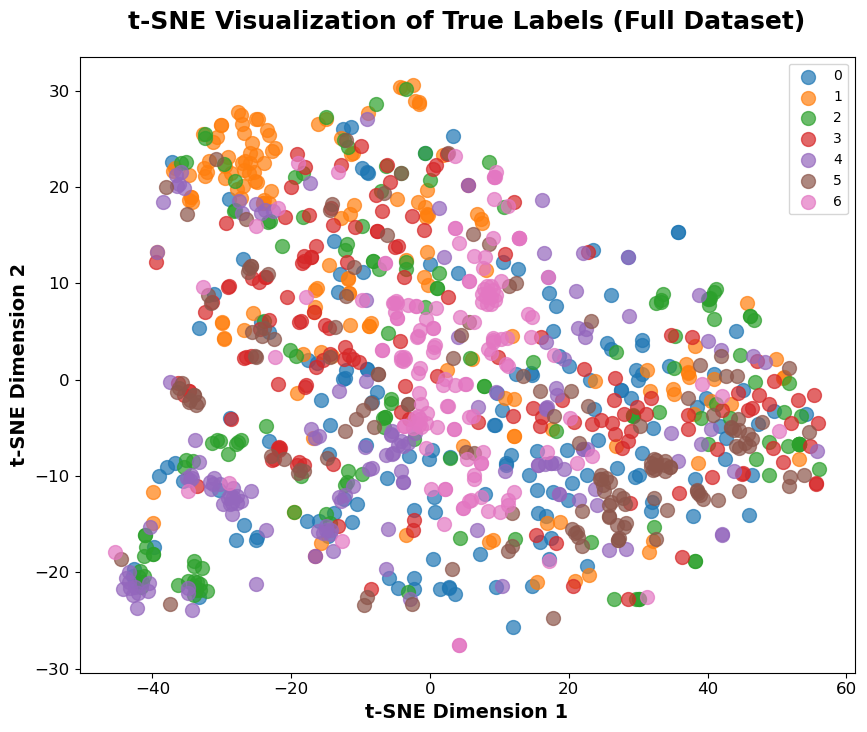

C:\Users\Olivi\AppData\Local\Temp\ipykernel_2356\1849922494.py:32: UserWarning:

You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.



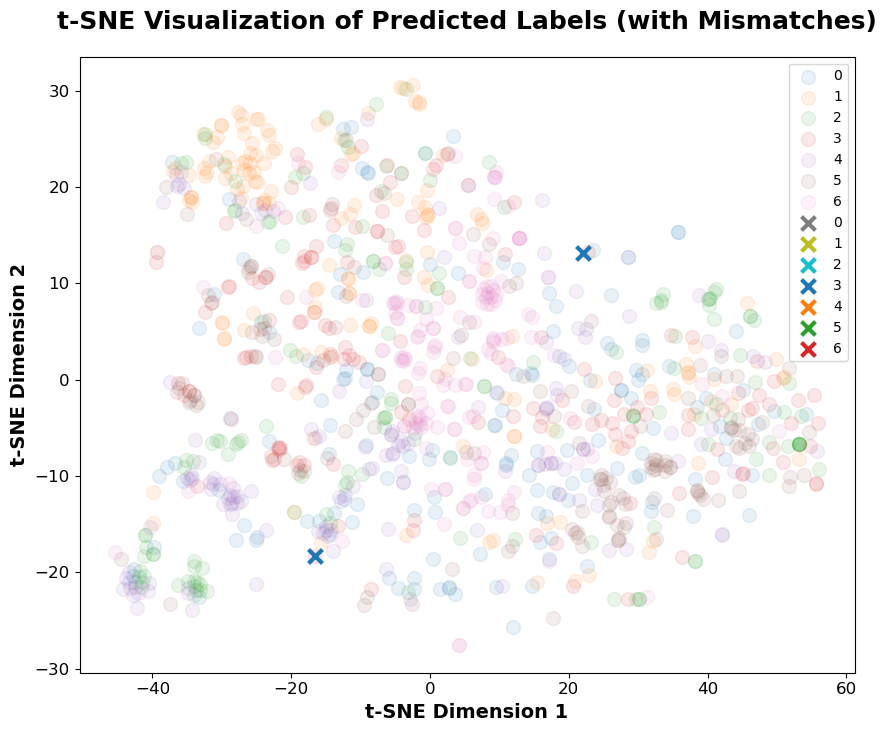

In [59]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Compute t-SNE embeddings
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_padded)

# Create a scatter plot colored by true labels
plt.figure(figsize=(10, 8))
for label in np.unique(y_encoded):
    indices = np.where(y_encoded == label)
    plt.scatter(X_tsne[indices, 0], X_tsne[indices, 1], label=label, alpha=0.7)

plt.title('t-SNE Visualization of True Labels (Full Dataset)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()


# Create a scatter plot colored by predicted labels, highlighting mismatches
plt.figure(figsize=(10, 8))

# Plot points where predicted labels match true labels
for label in np.unique(y_pred):
    indices = np.where((y_pred == label) & (y_pred == y_encoded))  # Filter for matching labels
    plt.scatter(X_tsne[indices, 0], X_tsne[indices, 1], label=label, alpha=0.1)  # Set transparency to 0.2 for correct predictions

# Plot points where predicted labels do not match true labels
for label in np.unique(y_pred):
    indices = np.where((y_pred == label) & (y_pred != y_encoded))  # Filter for mismatched labels
    plt.scatter(X_tsne[indices, 0], X_tsne[indices, 1], label=label, alpha=1, marker='x', edgecolors='black')  # Set transparency to 0.7 for mismatches

plt.title('t-SNE Visualization of Predicted Labels (with Mismatches)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()



## III.1. HYPERPARAMETER OPTIMIZATION

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from sklearn.model_selection import StratifiedKFold, ParameterGrid
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, adjusted_rand_score

# Define the number of epochs
epochs = 10


# Tokenize the text data and pad sequences
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(df_data['clean_description'])
X_sequences = tokenizer.texts_to_sequences(df_data['clean_description'])
X_padded = tf.keras.preprocessing.sequence.pad_sequences(X_sequences)

# Encode the target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df_data['top_category'])

# Define the number of folds for cross-validation
n_splits = 2
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'embedding_dim': [50, 100, 200],
    'dropout': [0.1, 0.2, 0.3],
    'units': [50, 100, 150],
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [32, 64, 128]
}

best_performance = float('-inf')
best_params = None

# Iterate over all parameter combinations
for params in ParameterGrid(param_grid):
    print("Testing parameters:", params)
    
    # Initialize lists to store evaluation metrics
    accuracies = []
    aris = []

    # Perform cross-validation
    for train_index, test_index in skf.split(X_padded, y_encoded):
        X_train, X_test = X_padded[train_index], X_padded[test_index]
        y_train, y_test = y_encoded[train_index], y_encoded[test_index]

        # Define the RNN model
        model = Sequential()
        model.add(Embedding(input_dim=vocab_size, output_dim=params['embedding_dim']))
        model.add(SpatialDropout1D(params['dropout']))
        model.add(LSTM(params['units'], dropout=params['dropout'], recurrent_dropout=params['dropout']))
        model.add(Dense(len(label_encoder.classes_), activation='softmax'))

        model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=params['learning_rate']), metrics=['accuracy'])

        # Train the model
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=params['batch_size'], validation_split=0.1, verbose=0)

        # Evaluate the model
        y_pred = np.argmax(model.predict(X_test), axis=-1)
        accuracy = accuracy_score(y_test, y_pred)
        ari = adjusted_rand_score(y_test, y_pred)

        accuracies.append(accuracy)
        aris.append(ari)

    # Calculate the mean accuracy and ARI across folds
    mean_accuracy = np.mean(accuracies)
    mean_ari = np.mean(aris)
    
    print("Mean Accuracy (cross-validated):", mean_accuracy)
    print("Mean Adjusted Rand Index (cross-validated):", mean_ari)

    # Update best performance and best parameters if needed
    if mean_ari > best_performance:
        best_performance = mean_ari
        best_params = params

print("Best Performance:", best_performance)
print("Best Parameters:", best_params)
